In [2]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from skimage import data, img_as_float32
from skimage.util import random_noise
from skimage import io, color
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
   
def set_image_position(i, j, image, title):
    ax[i, j].imshow(image)
    ax[i, j].axis('off')
    ax[i, j].set_title(title)
    
def set_image_position_2(i, j, image, title):
    from matplotlib.colors import LogNorm
    ax[i, j].imshow(np.abs(image), norm=LogNorm(vmin=5))
    ax[i, j].axis('off')
    ax[i, j].set_title(title)
    
def set_image_position_3(i, image, title):
    ax[i].imshow(image.real)
    ax[i].axis('off')
    ax[i].set_title(title)

# Poner aqui el nombre de la imagen que se desea procesar
image = 'einstein.png'

ModuleNotFoundError: No module named 'skimage.metrics'


# Remover ruido en  imágenes


In [3]:
# Leer y plotear la imagen
original_image = io.imread(image)
original_image = color.rgb2gray(original_image)

# Insertar ruido a la imagen
sigma = 0.12
noisy_image = random_noise(original_image, var=sigma**2)

# Mostrar imágenes
plt.gray()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5), sharex=True, sharey=True)
set_image_position_3(0, original_image, 'Imagen original')
set_image_position_3(1, noisy_image, 'Imagen con ruido')

NameError: name 'image' is not defined

 ## Transformada Rápida de Fourier (TRF)

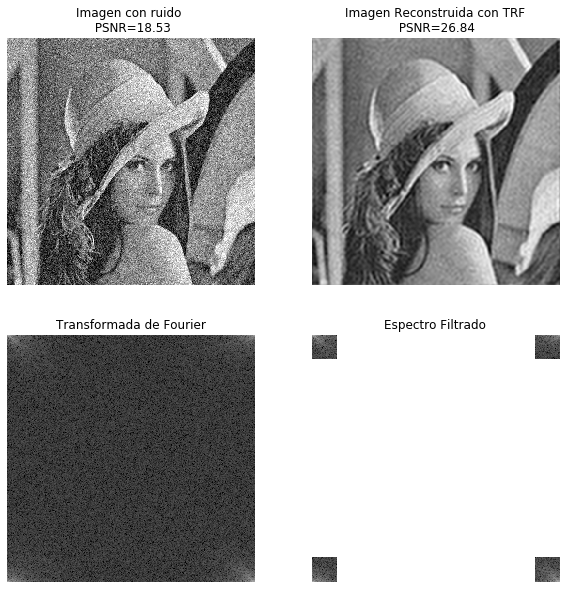

In [12]:
# Computa la TRF 2D de la imagen con ruido
im_fft = fftpack.fft2(noisy_image)  

# Se realiza una copia del espectro original y se truncan los coeficientes.

# Se define la fracción de los coeficientes (en cada dirección) que se mantienen.
keep_fraction = 0.1

# Se realiza una copia de la transformada original.
im_fft2 = im_fft.copy()

# Se establece r y c, que son el número de filas y columnas del array.
r, c = im_fft2.shape

# Se igualan a cero todas las filas con índices entre r*keep_fraction y r*(1-keep_fraction).
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similar con las columnas.
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# Se reconstruye la imagen sin ruido del espectro filtrado, se mantiene solo la parte real para mostrar.
new_image = fftpack.ifft2(im_fft2).real

#Calcular la metrica PSNR
psnr_noisy = peak_signal_noise_ratio(original_image, noisy_image)
psnr_fourier = peak_signal_noise_ratio(original_image, new_image)

# Mostrar imágenes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
set_image_position(0, 0, noisy_image, 'Imagen con ruido \n PSNR={:0.4g}'.format(psnr_noisy))
set_image_position(0, 1, new_image, 'Imagen Reconstruida con TRF\n PSNR={:0.4g}'.format(psnr_fourier))
set_image_position_2(1, 0, im_fft, 'Transformada de Fourier')
set_image_position_2(1, 1, im_fft2, 'Espectro Filtrado')
plt.show()

## Transformada Discreta de Wavelet (TDW)


Estimated Gaussian noise standard deviation = 0.1052847603757273


/home/karla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/home/karla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/home/karla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/home/karla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
/home/karla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for intege

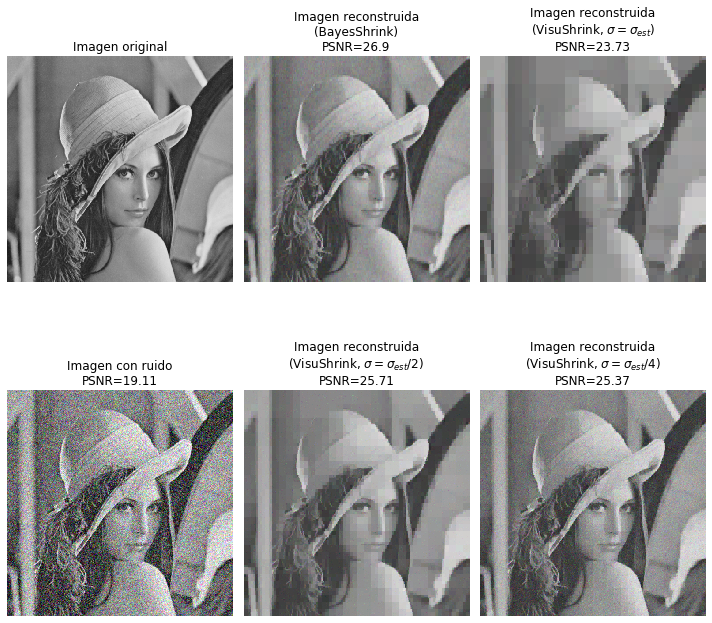

In [14]:
# Computa la TDW de la imagen con ruido.

original_image = img_as_float(plt.imread(image).astype(np.float32))

# Insertar ruido a la imagen.
sigma = 0.12
noisy_image = random_noise(original_image, var=sigma**2)

# Estimar la desviación estándar de ruido promedio en los canales de color.
sigma_est = estimate_sigma(noisy_image, multichannel=True, average_sigmas=True)

# Debido al recorte en random_noise, la estimación será un poco menor que el sigma especificado.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

im_bayes = denoise_wavelet(noisy_image, mode='soft', multichannel=True, 
                           method='BayesShrink', rescale_sigma=True)

im_visushrink = denoise_wavelet(noisy_image, mode='soft', multichannel=True,
                                method='VisuShrink',
                                sigma=sigma_est, rescale_sigma=True)
 
# VisuShrink está diseñado para eliminar el ruido con alta probabilidad, pero esto
# da como resultado una apariencia visualmente demasiado suave. Repita, especificando
# una reducción en el umbral por factores de 2 y 4.
im_visushrink2 = denoise_wavelet(noisy_image, multichannel=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2, rescale_sigma=True)

im_visushrink4 = denoise_wavelet(noisy_image, multichannel=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4, rescale_sigma=True)

# Computa PSNR como una indicación de la calidad de la imagen.
psnr_noisy = peak_signal_noise_ratio(original_image, noisy_image)
psnr_bayes = peak_signal_noise_ratio(original_image, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original_image, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(original_image, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original_image, im_visushrink4)

# Mostrar imágenes.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 10), sharex=True, sharey=True)
set_image_position(0, 0, original_image, 'Imagen original')
set_image_position(0, 1, im_bayes, 'Imagen reconstruida\n(BayesShrink)\n' 'PSNR=%0.4g' % psnr_bayes)
set_image_position(0, 2, im_visushrink, 'Imagen reconstruida\n(VisuShrink, $\\sigma=\\sigma_{est}$)\n' 'PSNR=%0.4g' % psnr_visushrink)
set_image_position(1, 0, noisy_image, 'Imagen con ruido\n' 'PSNR=%0.4g' % psnr_noisy)
set_image_position(1, 1, im_visushrink2, 'Imagen reconstruida\n(VisuShrink, $\\sigma=\\sigma_{est}/2$)\n' 'PSNR=%0.4g' % psnr_visushrink2)
set_image_position(1, 2, im_visushrink4, 'Imagen reconstruida\n(VisuShrink, $\\sigma=\\sigma_{est}/4$)\n' 'PSNR=%0.4g' % psnr_visushrink4)
fig.tight_layout()
plt.show()